In [1]:
from github import Github
from github import GithubException
import json
def login(token):
    g = Github(token)
    return g;
def getReadme(g,file_name):
    repositories = g.search_repositories(query='language:rust')
    file_object = open(file_name,'w')
    cnt = 0
    raw_data = []
    for repo in repositories:
        # if cnt == 780:
        #     continue
        try:
            cnt = cnt+1
            print(repo.stargazers_count,repo.full_name)
            a = json.dumps({'full_name':repo.full_name,'owner':repo.owner.name,'stars':repo.stargazers_count,'readme':repo.get_readme().decoded_content.decode('utf-8')})
            raw_data.append(a)
            file_object.write(a)
            print(cnt)
        except GithubException:
            continue
        if cnt == 1000:
            break
    print(raw_data[0])
    file_object.close()
    return raw_data

token = ''
g = login(token)
data = getReadme(g,'repo_readme.json')




85972 denoland/deno
1
73547 rust-lang/rust
2
53062 tauri-apps/tauri
3
42493 alacritty/alacritty
4
37719 sharkdp/bat
5
33825 BurntSushi/ripgrep
6
30838 rust-lang/rustlings
7
30641 rustdesk/rustdesk
8
30325 meilisearch/meilisearch
9
29771 starship/starship
10
29477 rust-unofficial/awesome-rust
11
24992 sharkdp/fd
12
24635 yewstack/yew
13
24335 swc-project/swc
14
21208 nushell/nushell
15
19738 lapce/lapce
16
19698 firecracker-microvm/firecracker
17
19646 xi-editor/xi-editor
18
19565 ogham/exa
19
19494 rome/tools
20
19413 dani-garcia/vaultwarden
21
19272 bevyengine/bevy
22
18766 SergioBenitez/Rocket
23
17959 tokio-rs/tokio
24
17368 facebook/relay
25
16570 diem/diem
26
16506 iced-rs/iced
27
15540 actix/actix-web
28
15445 dandavison/delta
29
15260 helix-editor/helix
30
14601 spacedriveapp/spacedrive
31
13956 cube-js/cube.js
32
13923 surrealdb/surrealdb
33
13819 valeriansaliou/sonic
34
13532 Rigellute/spotify-tui
35
13283 Wilfred/difftastic
36
13203 sharkdp/hyperfine
37
13195 wasmerio/wasmer


In [8]:
import pandas as pd
import re
real_data = []
for json_repo in data:
    real_data.append(json.loads(json_repo))
for repo in real_data:
    repo['readme_proceed'] = re.sub('[,\.!?]', '', repo['readme'])
    repo['readme_proceed'] = repo['readme'].lower()
    # print(repo['readme_proceed'])

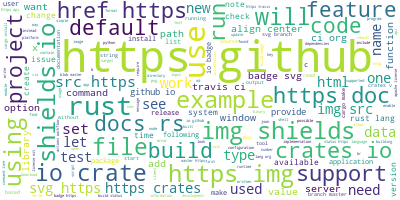

In [11]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
readme_data = [i['readme_proceed'] for i in real_data]
long_string = ','.join(readme_data)

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [12]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
# stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]


data_words = list(sent_to_words(readme_data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wuxiao/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['deno', 'build', 'status', 'cirrus', 'build', 'status', 'twitter', 'handle', 'twitter', 'badge', 'discord', 'chat', 'https', 'img', 'shields', 'io', 'discord', 'logo', 'discord', 'style', 'social', 'https', 'discord', 'gg', 'deno', 'img', 'align', 'right', 'src', 'https']


In [13]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 3), (10, 1), (11, 1), (12, 1), (13, 2), (14, 5), (15, 3), (16, 2), (17, 1), (18, 1), (19, 2), (20, 1), (21, 2), (22, 5), (23, 1), (24, 1), (25, 5), (26, 1), (27, 3), (28, 1), (29, 3)]


In [14]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.021*"https" + 0.011*"rust" + 0.009*"github" + 0.009*"com" + 0.008*"rs" + '
  '0.007*"io" + 0.007*"use" + 0.006*"cargo" + 0.005*"crates" + 0.005*"docs"'),
 (1,
  '0.040*"https" + 0.021*"com" + 0.018*"github" + 0.011*"rust" + 0.009*"io" + '
  '0.006*"cargo" + 0.005*"img" + 0.005*"build" + 0.005*"svg" + 0.005*"rs"'),
 (2,
  '0.036*"https" + 0.017*"com" + 0.016*"github" + 0.013*"rust" + 0.009*"rs" + '
  '0.007*"crates" + 0.007*"io" + 0.006*"cargo" + 0.006*"build" + 0.006*"docs"'),
 (3,
  '0.017*"https" + 0.014*"com" + 0.010*"rust" + 0.010*"github" + 0.007*"use" + '
  '0.006*"io" + 0.006*"cargo" + 0.005*"rs" + 0.005*"code" + 0.005*"crates"'),
 (4,
  '0.036*"https" + 0.021*"com" + 0.020*"github" + 0.012*"rust" + 0.007*"io" + '
  '0.007*"rs" + 0.007*"org" + 0.006*"img" + 0.006*"build" + 0.006*"svg"'),
 (5,
  '0.034*"https" + 0.018*"com" + 0.015*"github" + 0.011*"io" + 0.010*"rust" + '
  '0.007*"org" + 0.007*"crates" + 0.006*"rs" + 0.006*"build" + 0.006*"img"'),
 (6,
  '0.040*"https"

In [15]:
# import pyLDAvis.gensim
# import pickle
# import pyLDAvis
# import os
# # Visualize the topics
# pyLDAvis.enable_notebook()
#
# LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
#
# # # this is a bit time consuming - make the if statement True
# # # if you want to execute visualization prep yourself
# if 1 == 1:
#     LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
#     with open(LDAvis_data_filepath, 'wb') as f:
#         pickle.dump(LDAvis_prepared, f)
#
# # load the pre-prepared pyLDAvis data from disk
# with open(LDAvis_data_filepath, 'rb') as f:
#     LDAvis_prepared = pickle.load(f)
#
# pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
#
# LDAvis_prepared

/Users/wuxiao/.conda/envs/untitled/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload


AttributeError: module 'pyLDAvis' has no attribute 'gensim'